In [1]:
import numpy as np
from misc_tools.print_latex import print_tex
import matplotlib.pyplot as plt

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

Matrix equation 
$$A\vec{x} = \vec{b}$$
can be interpreted as $A$ being a matrix transformation that acts on a vector $\vec{v}$ and produces $\vec{b}$

A bit of digression from main topic. 

Equation $A\vec{x} = \vec{b}$ can be interpreted as finding linear combinations of columns of $A$ with coefficients contained in $\vec{x}$
$$A\vec{x} =
\begin{bmatrix}
a_{11} & a_{12} \\ a_{21} & a_{22} 
\end{bmatrix}
\begin{bmatrix}
\alpha \\ \beta
\end{bmatrix} = 
\begin{bmatrix}
\vec{A}_1 & \vec{A}_2
\end{bmatrix}
\begin{bmatrix}
\alpha \\ \beta
\end{bmatrix}=
\alpha \vec{A}_1 + \beta\vec{A}_2$$

Using this interpretation we can encounter matrices $A$ where columns are linearly dependant, in which case arbitrary $\vec{b}$ cannot be constructed via linear combination. 

In other words -  "columns of $A$ dont span space of $\vec{b}$"

Such matrices can be determined by examining their 'rank' or by calculating their determinant.

Consider $A$ with linearly dependant columns as

$$A = \begin{bmatrix}
\vec{A}_1 & \alpha \cdot \vec{A}_1
\end{bmatrix} = \begin{bmatrix}
a & \alpha \cdot a \\ b & \alpha \cdot  b
\end{bmatrix}$$

determinant is

$$|A| = \alpha \cdot  a \cdot b - \alpha \cdot  b \cdot a = 0$$

Any matrices that have determinant of zero are called 'singular'.

<u>Main takeaway is that columns of a singular matrix are linearly dependant.</u>

*   Dependant columns of a matrix reduce the space which they can span. 

*   Space which 'can be explored' is determined by matrices 'rank'. 

*   Remaining space is 'discarded' by producing maps to zero space (called 'kernel' or 'nullspace').

https://en.wikipedia.org/wiki/Rank%E2%80%93nullity_theorem

In [2]:
A1 = np.array([[1,2]]).T
alpha = 0.5
A2 = alpha * A1
A = np.hstack((A1, A2))
print_tex(A) 
print(f'{np.linalg.det(A) = }')

<IPython.core.display.Math object>

np.linalg.det(A) = 0.0


What if we search for a problem where transformation produces vectors that are collinear to original vectors
$$A\vec{v} = \lambda \vec{v}$$

set of of vectors that satisfy this problem are called _eigenvectors_ and their scaling constants are called _eigenvalues._

One can rewrite this equation into a form
$$A\vec{v} - \lambda \vec{v} = \vec{0}$$
$$\underbrace{(A - \lambda I) }_{A^\prime}\vec{v} = \vec{0}$$
notice that this expression is also a linear transformation on $\vec{v}$
$$A^\prime\vec{v} = \vec{0}$$
Except we are mapping vectors onto zero vectors. 
***
In a 'healthy' transformation, like scaling and rotation, only zero vectors map onto zero vectors $A \vec{0} = \vec{0}$. We call this solution case __trivial__.

We can take step back and rephrase it: "_only way to produce zero (vector) using combination of columns of A, is to have all coefficients being zero_". 
***
An 'unhealthy' transformation, will have a solution with non-zero coefficients. Accidentally, as we have discussed, if matrix $A$ has linearly dependant columns, it is 'singular' and has determinant of zero.
***
In our problem
$$A^\prime\vec{v} = \vec{0} = (A - \lambda I)\vec{v} = \vec{0}$$
We search for such __non-trivial__ solutions $\vec{v}_i$ which will map to zero vectors. 

Under proper selection of $\lambda_i$ values, matrix $A^\prime(\lambda) = (A - \lambda I)$ becomes singular and will yield non-trivial result.

So, we ask for 
$$|A - \lambda I| = 0$$

for example

$$A = 
\begin{bmatrix}
3 & 2\\ 2 & 6
\end{bmatrix}$$

In [3]:
A = np.array([[3,2],[2,6]])


$$|A - \lambda I| = \bigg|
\begin{matrix}
3- \lambda& 2\\ 2 & 6-\lambda
\end{matrix}
\bigg|=

\lambda^2 - 9\lambda + 14 = (\lambda - 7)(\lambda - 2) = 0
$$

We see that we have two solutions $\lambda_1 = 7$ and $\lambda_2 = 2$, which are two eigenvalues.

To find eigenvectors we calculate two cases:
***
$\lambda_1 = 7:$
$$(A - \lambda_1 I)\vec{v}_1 = \vec{0}$$
$$\begin{bmatrix}
-4 & 2\\ 2 & -1
\end{bmatrix}\vec{v}_1 = \vec{0}$$
$$\begin{matrix}
-4 v_{11} &=& -2 v_{12}\\ 2v_{11} &=& v_{12}
\end{matrix}\rightarrow \vec{v}_1 = [v_{11}, 2v_{11}]^T = v_{11}[1,2]^T
$$
***
$\lambda_2 = 2:$
$$(A - \lambda_2 I)\vec{v}_2 = \vec{0}$$

$$\begin{bmatrix}
1 & 2\\ 2 & 4
\end{bmatrix}\vec{v}_2 = \vec{0}$$
$$\begin{matrix}
1 v_{21} &=& -2 v_{22}\\ 2v_{21} &=& -4 v_{22}
\end{matrix}\rightarrow\vec{v}_2 = [-2v_{22}, v_{22}]^T = v_{22}[-2,1]^T$$

can set $v_{11} = v_{22} = 1$

In [4]:
eig_system_d = np.linalg.eig(A)._asdict()
evecs = eig_system_d['eigenvectors'].copy()
evecs/=evecs[1,0]
print_tex('\lambda_1, \lambda_2 = ', eig_system_d['eigenvalues'])
print_tex(r'[\vec{v}_1, \vec{v}_2] = ', evecs)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

***
Changing length of an eigenvector still keeps it an eigenvector, even eigenvalue does not have to be rescaled.

Given the following is true: $$A\vec{v}_1 = \lambda_1 \vec{v}_1$$
we define a rescaled vector and apply $A$
$$\hat{\vec{v}_1} = \frac{\vec{v}_1}{|| \vec{v}_1||}$$
$$A\hat{\vec{v}_1} = \frac{A \vec{v}_1}{|| \vec{v}_1||} = \frac{\lambda_1 \vec{v}_1}{|| \vec{v}_1||} = \lambda_1 \hat{\vec{v}_1}$$
and see that OG expression is still satisfied.

***
We can see that eigenvectors are orthogonal:
$$\vec{v}_1 \cdot \vec{v}_2 = -2 + 2 = 0$$
So they are viable for constructing orthogonal coordinate system. 

Our choice for $v_{11}$ and $v_{22}$ could be made such as to make new basis vectors of unit length, thus forming _orthonormal_ coordinate system.

In [5]:
vecs = evecs.T
print_tex(f'dot(', *vecs, ')=', np.dot(*vecs)) # cols to rows and open

<IPython.core.display.Math object>

## Spectral radius $\rho(A)$
https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf

Mentions interested aspects from spectral theory when $A$ is applied repeatedly.

We can decompose any vector into a basis of eigenvectors

$$\vec{d} = \alpha \vec{v}_1 + \beta \vec{v}_2$$

We know that

$$A \alpha \vec{v}_1 = \alpha \lambda_1 \vec{v}_1 $$
so
$$A\vec{d} = A(\alpha \vec{v}_1 + \beta \vec{v}_2) = \alpha \lambda_1 \vec{v}_1 + \beta \lambda_2 \vec{v}_2$$
and 
$$A^2 \vec{d} = A(A\vec{d} ) = \alpha \lambda_1^2 \vec{v}_1 + \beta \lambda_2^2 \vec{v}_2$$
Depending on eigenvalues of $A$, by performing repeated application of transformation, we can expected $\vec{d}$ to either shrink or grow infinitely.

Spectral radius $\rho(A) = max\{\lambda_i\}_i$ is a measure that explains this dynamics. $\rho(A) < 1$, then vector shrinks, and so on.

This is important aspect of iterative methods, where such transformations are common.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

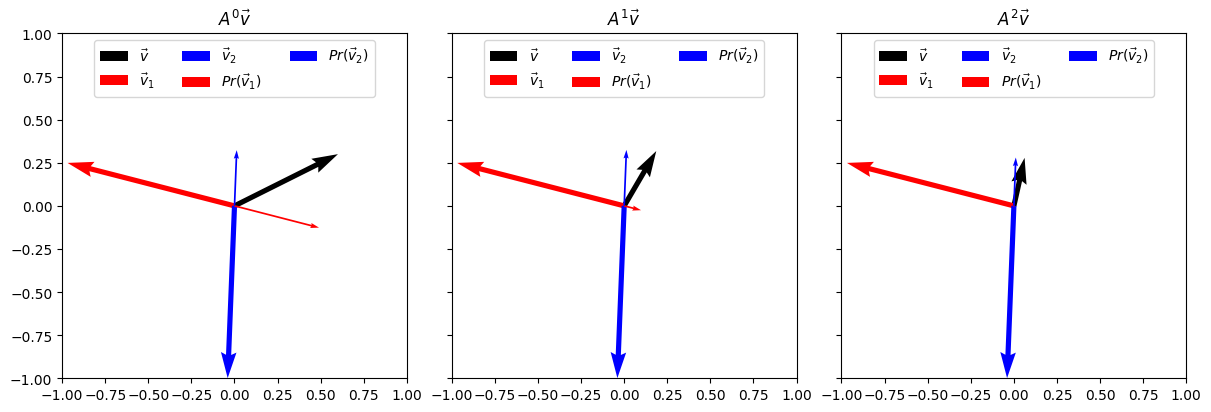

In [6]:
np.random.seed(5)
A =np.array([[3,0.2],[1.3,8]])/10
eig_system_d = np.linalg.eig(A)._asdict()
v1, v2 = eig_system_d['eigenvectors'].T
l1,l2 = eig_system_d['eigenvalues']
print_tex(r'\vec{v}_1 = ',v1,r'; \ \lambda_1=', l1, frmt='{:.2f}')
print_tex(r'\vec{v}_2 = ',v2,r'; \ \lambda_2=', l2, frmt='{:.2f}')

def pr_v1(x):
    return np.dot(x, v1)*v1/np.dot(v1,v1)

def pr_v2(x):
    return np.dot(x, v2)*v2/np.dot(v2,v2)

v_test = np.array([0.6,0.3])
N = 3
fig, axs = plt.subplots(1,3, figsize = (N*4, 4), sharex=1, sharey=1, layout='constrained')

xl = (-1,1)
yl = (-1,1)

for i in range(3):
    
    axs[i].quiver(0, 0, *v_test, color = 'k', units='xy',  scale = 1, width = 0.03, label = r'$\vec{v}$')
    axs[i].quiver(*(0, 0), *v1, color = 'r', units='xy',  scale = 1, width = 0.03, label = r'$\vec{v}_1$')
    axs[i].quiver(*(0, 0), *v2, color = 'b', units='xy',  scale = 1, width = 0.03, label = r'$\vec{v}_2$')
    axs[i].quiver(*(0, 0), *pr_v1(v_test), color = 'r', units='xy',  scale = 1, width = 0.01, label = r'$Pr(\vec{v}_1$)')#,linestyle='dashed'
    axs[i].quiver(*(0, 0), *pr_v2(v_test), color = 'b', units='xy',  scale = 1, width = 0.01, label = r'$Pr(\vec{v}_2$)')
    axs[i].set_xlim(xl)
    axs[i].set_ylim(yl)
    axs[i].set_title(r'$A^'+str(i)+ r'\vec{v}$')
    axs[i].legend(loc='upper center', ncols = 3)
    axs[i].set_aspect(1)
    v_test = A @ v_test


# Eigenvalues of rank-1 matrix $\longleftrightarrow \vec{v}\vec{v}^T$ 

Outer product of two vectors result in rank 1 matrix
$$A = \vec{v}\vec{v}^T = \begin{bmatrix}
v_1 \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_N \end{bmatrix}&
v_2 \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_N \end{bmatrix}&
\dots &
v_N \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_N \end{bmatrix}&
\end{bmatrix}=
\begin{bmatrix}
v_1 \vec{v} & v_2 \vec{v} & \dots v_N \vec{v}
\end{bmatrix}$$
Clearly columns are linearly dependant and only one of them 'contains information', which also means that matrix $A$ is singular $\rightarrow \det(A) = 0$

We write a stages of eigenproblem calculation:
$$A\vec{x} = \lambda \vec{x}$$
$$(A- \lambda)\vec{x} = 0$$
$$\det (A -\lambda I) = 0$$
Since $\det(A) = 0$ (but rank = 1), all but one $\lambda = 0$ is automatically satisfied. What is non-zero $\lambda$?
Outer product of two vectors shows interesting property
$$A\vec{x} = (\vec{v}\vec{v}^T)\vec{x}$$
yet we can rewrite
$$(\vec{v}\vec{v}^T)\vec{x} = \vec{v}(\vec{v}^T\vec{x}) = (\vec{v}^T\vec{x})\vec{v}$$

>Mini-visual proof:
>$$(\vec{v}\vec{v}^T)\vec{x} = \begin{bmatrix}
v_1 \vec{v} & v_2 \vec{v} & \dots v_N \vec{v}
\end{bmatrix}\begin{bmatrix}
x_1 \\ x_2 \\ \vdots \\ x_N
\end{bmatrix}= \sum_{i=1}^N v_i x_i \vec{v} = (\vec{v} \cdot \vec{x}) \vec{v} = (\vec{v}^T\vec{x})\vec{v}$$
expression is our eigenproblem.

$$A\vec{x} = (\vec{v}\vec{v}^T)\vec{x} = (\vec{v}^T\vec{x})\vec{v}$$
If we try eigenvector $\vec{x} \rightarrow \vec{v}$ we see that it is the solution of a problem
$$A\vec{v} = (\vec{v}^T\vec{v})\vec{v}= ||\vec{v}||_2\vec{v}$$
eigenvalue of $\vec{v}^T\vec{v} = ||\vec{v}||_2$

It is our missing non-zero eigenvalue. In fact we sett that it is euclidean norm, which non-negative.

__Only non-zero eigenvalue of rank-1 matrix is non-negative!__

In [11]:
v = np.array([1,2])
A = vvt = np.outer(v,v)
np.linalg.eig(vvt)._asdict()

{'eigenvalues': array([0., 5.]),
 'eigenvectors': array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]])}

# Matrix with non-negative eigenvalues is positive-semidefinite

(related to previous section on rank-1 matrices)

Lets perform spectral decomposition of $A$
$$A = Q \Lambda Q^{-1}= Q \Lambda Q^T$$
where $Q$ has columns as eigenvalues of $A$ and $\Lambda $ is __diagonal__ matrix of eigenvalues

Definition of positive-semidifinite requires
$$\vec{x}^TA\vec{x} \geq 0$$
Replace $A$ with decomposition
$$\vec{x}^TA\vec{x} = \vec{x}^T Q \Lambda Q^T\vec{x} = (Q^T\vec{x})^T \Lambda (Q^T\vec{x})$$
$Q^T\vec{x} = \vec{y}$ is a rotated reference frame, so
$$\vec{x}^TA\vec{x} = \vec{y}^T\Lambda\vec{y} = \sum_{i=1}^N \lambda_i y_i^2 \geq 0 ;\ (if \ \lambda_i \geq 0)$$

This implies that $\vec{x}^TA\vec{x}$ represents a rotated 'cup pointing up' (or flat plane if eigenvalues are zero. is it possible?). So all values of $\vec{x}^TA\vec{x} \geq 0$ 

